<a href="https://colab.research.google.com/github/Romneasek/K_Means_Project/blob/main/K_Means_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [72]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline

In [73]:
df=pd.read_csv('//content/Employee_Salary_Compensation.csv')
df.head()

,Organization Group Code,Job Family Code,Job Code,Year Type,Year,Organization Group,Department Code,Department,Union Code,Union,...,Employee Identifier,Salaries,Overtime,Other Salaries,Total Salary,Retirement,Health and Dental,Other Benefits,Total Benefits,Total Compensation
0,1,1000,1021,Calendar,2013,Public Protection,ADP,ADP Adult Probation,21.0,"Prof & Tech Engineers - Miscellaneous, Local 21",...,37730,57534.65,0.0,0.00,57534.65,11253.16,11961.34,4532.63,27747.13,85281.78
1,1,1000,1023,Calendar,2013,Public Protection,ADP,ADP Adult Probation,21.0,"Prof & Tech Engineers - Miscellaneous, Local 21",...,26574,57678.50,0.0,0.00,57678.50,10284.88,7176.80,4755.14,22216.82,79895.32
2,1,1000,1031,Calendar,2013,Public Protection,ADP,ADP Adult Probation,21.0,"Prof & Tech Engineers - Miscellaneous, Local 21",...,8148,63532.93,0.0,0.00,63532.93,12495.83,12918.24,4702.71,30116.78,93649.71
3,1,1000,1054,Calendar,2013,Public Protection,ADP,ADP Adult Probation,21.0,"Prof & Tech Engineers - Miscellaneous, Local 21",...,27436,101274.51,0.0,-7058.59,94215.92,19644.45,12918.24,7458.76,40021.45,134237.37
4,1,1000,1062,Calendar,2013,Public Protection,ADP,ADP Adult Probation,21.0,"Prof & Tech Engineers - Miscellaneous, Local 21",...,37730,5084.00,0.0,0.00,5084.00,1083.90,956.91,387.50,2428.31,7512.31


In [74]:
df.shape

(678524, 22)

In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 678524 entries, 0 to 678523
Data columns (total 22 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Organization Group Code  678524 non-null  int64  
 1   Job Family Code          678524 non-null  object 
 2   Job Code                 678524 non-null  object 
 3   Year Type                678524 non-null  object 
 4   Year                     678524 non-null  int64  
 5   Organization Group       678524 non-null  object 
 6   Department Code          678522 non-null  object 
 7   Department               678522 non-null  object 
 8   Union Code               678345 non-null  float64
 9   Union                    678345 non-null  object 
 10  Job Family               678524 non-null  object 
 11  Job                      678519 non-null  object 
 12  Employee Identifier      678524 non-null  int64  
 13  Salaries                 678524 non-null  float64
 14  Over

In [76]:
df['Salaries'][0]+df['Overtime'][0]+df['Other Salaries'][0]+df['Retirement'][0]+df['Health and Dental'][0]+df['Other Benefits'][0]

85281.78

In [77]:
df['Total Compensation'][0]

85281.78

In [78]:
df['Total Salary'][0] + df['Total Benefits'][0]

85281.78

In [79]:
df['Employee Identifier'].nunique()

322178

1. Total number of features = 22, Total number of records = 678524 including some null values
2. There are several features that are redundant (eg. Job and Job Code, Organization Group and Organization Group Code etc. which need to be addressed)
3. There are some null values in features: Union/Union Code, Dept/Dept Code and Job that need adressing
4. Total Compensation = Total Salary + Total Benefits
5. Total Salary = Salaries + Overtime + Other Salaries
6. Total Benefits = Retirement + Health & Dental + Other Benefits
7. Thus, we can drop Total Salary and Total Benefits, since their sub-components add up to total Compensation
8. There are 322178 unique Emp IDs, indicating that an employee can hold more than one job or could have been part of multiple departments or continues to be part of the organization.

*****************************************

We will drop the following columns from the dataset,

1. Redundant Columns: Organization Group Code, Job Family Code,Job Code,Department Code, Union Code - as these are categorical variables, retaining the Code will end up considering it as a numerical value thus affecting the mode.
2. Insignificant Columns: Employee Identifier, Total Salary, Total Benefits

In [80]:
df.drop(['Organization Group Code','Job Family Code','Job Code','Department Code','Union Code','Total Salary','Total Benefits'],inplace=True,axis=1)

In [81]:
df.drop(['Employee Identifier'],axis=1,inplace=True)

In [82]:
df.head()

,Year Type,Year,Organization Group,Department,Union,Job Family,Job,Salaries,Overtime,Other Salaries,Retirement,Health and Dental,Other Benefits,Total Compensation
0,Calendar,2013,Public Protection,ADP Adult Probation,"Prof & Tech Engineers - Miscellaneous, Local 21",Information Systems,IS Administrator 1,57534.65,0.0,0.00,11253.16,11961.34,4532.63,85281.78
1,Calendar,2013,Public Protection,ADP Adult Probation,"Prof & Tech Engineers - Miscellaneous, Local 21",Information Systems,IS Administrator 3,57678.50,0.0,0.00,10284.88,7176.80,4755.14,79895.32
2,Calendar,2013,Public Protection,ADP Adult Probation,"Prof & Tech Engineers - Miscellaneous, Local 21",Information Systems,IS Trainer-Assistant,63532.93,0.0,0.00,12495.83,12918.24,4702.71,93649.71
3,Calendar,2013,Public Protection,ADP Adult Probation,"Prof & Tech Engineers - Miscellaneous, Local 21",Information Systems,IS Business Analyst-Principal,101274.51,0.0,-7058.59,19644.45,12918.24,7458.76,134237.37
4,Calendar,2013,Public Protection,ADP Adult Probation,"Prof & Tech Engineers - Miscellaneous, Local 21",Information Systems,IS Programmer Analyst,5084.00,0.0,0.00,1083.90,956.91,387.50,7512.31


In [83]:
df.shape

(678524, 14)

In [84]:
df.dtypes

Year Type              object
Year                    int64
Organization Group     object
Department             object
Union                  object
Job Family             object
Job                    object
Salaries              float64
Overtime              float64
Other Salaries        float64
Retirement            float64
Health and Dental     float64
Other Benefits        float64
Total Compensation    float64
dtype: object

Categorical features: Year Type, Organization Group, Department, Union, Job Family, Job

In [85]:
df.isnull().sum()

Year Type               0
Year                    0
Organization Group      0
Department              2
Union                 179
Job Family              0
Job                     5
Salaries                0
Overtime                0
Other Salaries          0
Retirement              0
Health and Dental       0
Other Benefits          0
Total Compensation      0
dtype: int64

Features with Null values: Department, Union, Job. Let us figure out which are these null values and fill them accordingly.

In [86]:
df[df['Department'].isnull()]

,Year Type,Year,Organization Group,Department,Union,Job Family,Job,Salaries,Overtime,Other Salaries,Retirement,Health and Dental,Other Benefits,Total Compensation
548799,Fiscal,2017,General City Responsibilities,NaN,"SEIU, Local 1021, Misc",Correction & Detention,Sheriff's Cadet,49630.50,15016.51,4575.73,10619.27,12779.88,4796.56,96040.24
548800,Fiscal,2017,General City Responsibilities,NaN,POA,Police Services,Police Officer 2,116189.62,40990.09,2260.08,20076.66,14515.01,2724.05,196755.51


Let's impute this with the most frequent Department in the Organization Group General City Responsibilties

In [87]:
df[df['Organization Group'] == 'General City Responsibilities']['Department'].mode()

0    GEN General City / Unallocated
dtype: object

In [88]:
df['Department'].fillna('GEN General City / Unallocated',inplace=True)

In [89]:
df.isnull().sum()

Year Type               0
Year                    0
Organization Group      0
Department              0
Union                 179
Job Family              0
Job                     5
Salaries                0
Overtime                0
Other Salaries          0
Retirement              0
Health and Dental       0
Other Benefits          0
Total Compensation      0
dtype: int64

In [90]:
df[df['Union'].isnull()]['Department'].value_counts()

REC Recreation & Park Commsn     133
MTA Municipal Transprtn Agncy     46
Name: Department, dtype: int64

In [91]:
df[df['Union'].isnull()]['Organization Group'].value_counts()

Culture & Recreation                       133
Public Works, Transportation & Commerce     46
Name: Organization Group, dtype: int64

In [92]:
df[df['Union'].isnull()]['Job Family'].value_counts()

Recreation        133
Street Transit     46
Name: Job Family, dtype: int64

In [93]:
df[df['Union'].isnull()]['Job'].value_counts()

Recreation Facility Assistant        133
Transportation Controller Trainee     46
Name: Job, dtype: int64

In [94]:
df[df['Organization Group']=='Culture & Recreation']['Union'].mode()

0    SEIU, Local 1021, Misc
dtype: object

In [95]:
df[df['Department']=='REC Recreation & Park Commsn']['Union'].mode()

0    SEIU - Miscellaneous, Local 1021
dtype: object

In [96]:
df[df['Job Family']=='Recreation']['Union'].mode()

0    SEIU, Local 1021, Misc
dtype: object

In [97]:
df[df['Job']=='Recreation Facility Assistant']['Union'].mode()

0    SEIU, Local 1021, Misc
dtype: object

In [98]:
df['Union'].fillna('SEIU, Local 1021, Misc',inplace=True)

In [99]:
df.isnull().sum()

Year Type             0
Year                  0
Organization Group    0
Department            0
Union                 0
Job Family            0
Job                   5
Salaries              0
Overtime              0
Other Salaries        0
Retirement            0
Health and Dental     0
Other Benefits        0
Total Compensation    0
dtype: int64

In [100]:
df[df['Job'].isnull()]['Job Family'].value_counts()

Management        3
Dietary & Food    1
Park & Zoo        1
Name: Job Family, dtype: int64

In [101]:
df[df['Job Family']=='Management']['Job'].mode()

0    Manager II
dtype: object

In [102]:
df[df['Job Family']=='Dietary & Food']['Job'].mode()

0    Food Service Worker
dtype: object

In [103]:
df[df['Job Family']=='Park & Zoo']['Job'].mode()

0    Admission Attendant
dtype: object

In [104]:
pd.set_option('mode.chained_assignment','raise')

In [105]:
df[df['Job'].isna()]

,Year Type,Year,Organization Group,Department,Union,Job Family,Job,Salaries,Overtime,Other Salaries,Retirement,Health and Dental,Other Benefits,Total Compensation
197683,Calendar,2017,Community Health,Public Health,"Municipal Exec Assoc, Misc",Management,NaN,56887.83,0.0,27049.42,10382.10,8388.41,5633.01,94816.06
535421,Fiscal,2017,Community Health,Public Health,"Municipal Exec Assoc, Misc",Management,NaN,120426.76,0.0,0.00,21994.01,17084.16,9237.63,168742.56
542571,Fiscal,2017,Culture & Recreation,Recreation And Park Commission,"SEIU, Local 1021, Misc",Dietary & Food,NaN,6455.33,0.0,0.00,0.00,0.00,501.03,6956.36
544862,Fiscal,2017,Culture & Recreation,Recreation And Park Commission,"Teamsters, Local 856, Multi",Park & Zoo,NaN,2096.80,0.0,24381.20,390.21,383.32,1119.51,16180.44
577950,Fiscal,2018,Community Health,Public Health,"Municipal Exec Assoc, Misc",Management,NaN,0.00,0.0,27049.42,0.00,0.00,1034.64,14559.35


In [106]:
df.loc[197683,'Job'] = 'Manager II'

In [107]:
df.loc[535421,'Job'] = 'Manager II'

In [108]:
df.loc[577950,'Job'] = 'Manager II'

In [109]:
df.loc[542571,'Job'] = 'Food Service Worker'

In [110]:
df.loc[544862,'Job'] = 'Food Service Worker'

In [111]:
df.isnull().sum()

Year Type             0
Year                  0
Organization Group    0
Department            0
Union                 0
Job Family            0
Job                   0
Salaries              0
Overtime              0
Other Salaries        0
Retirement            0
Health and Dental     0
Other Benefits        0
Total Compensation    0
dtype: int64

All the Null/NaN values have been successfully imputed.

In [112]:
df.head()

,Year Type,Year,Organization Group,Department,Union,Job Family,Job,Salaries,Overtime,Other Salaries,Retirement,Health and Dental,Other Benefits,Total Compensation
0,Calendar,2013,Public Protection,ADP Adult Probation,"Prof & Tech Engineers - Miscellaneous, Local 21",Information Systems,IS Administrator 1,57534.65,0.0,0.00,11253.16,11961.34,4532.63,85281.78
1,Calendar,2013,Public Protection,ADP Adult Probation,"Prof & Tech Engineers - Miscellaneous, Local 21",Information Systems,IS Administrator 3,57678.50,0.0,0.00,10284.88,7176.80,4755.14,79895.32
2,Calendar,2013,Public Protection,ADP Adult Probation,"Prof & Tech Engineers - Miscellaneous, Local 21",Information Systems,IS Trainer-Assistant,63532.93,0.0,0.00,12495.83,12918.24,4702.71,93649.71
3,Calendar,2013,Public Protection,ADP Adult Probation,"Prof & Tech Engineers - Miscellaneous, Local 21",Information Systems,IS Business Analyst-Principal,101274.51,0.0,-7058.59,19644.45,12918.24,7458.76,134237.37
4,Calendar,2013,Public Protection,ADP Adult Probation,"Prof & Tech Engineers - Miscellaneous, Local 21",Information Systems,IS Programmer Analyst,5084.00,0.0,0.00,1083.90,956.91,387.50,7512.31


In [113]:
df.shape

(678524, 14)

In [114]:
df.dtypes

Year Type              object
Year                    int64
Organization Group     object
Department             object
Union                  object
Job Family             object
Job                    object
Salaries              float64
Overtime              float64
Other Salaries        float64
Retirement            float64
Health and Dental     float64
Other Benefits        float64
Total Compensation    float64
dtype: object

In [115]:
col_name=df.columns
for i in col_name:
    print(i,'has :',df[i].nunique(),"Unique values")

Year Type has : 2 Unique values
Year has : 8 Unique values
Organization Group has : 7 Unique values
Department has : 109 Unique values
Union has : 128 Unique values
Job Family has : 59 Unique values
Job has : 1349 Unique values
Salaries has : 497610 Unique values
Overtime has : 266218 Unique values
Other Salaries has : 307561 Unique values
Retirement has : 452677 Unique values
Health and Dental has : 208405 Unique values
Other Benefits has : 495763 Unique values
Total Compensation has : 654483 Unique values


In [116]:
from sklearn.preprocessing import LabelEncoder

In [117]:
encoder = LabelEncoder()

In [118]:
df = df.apply(encoder.fit_transform)

In [119]:
df.head()

,Year Type,Year,Organization Group,Department,Union,Job Family,Job,Salaries,Overtime,Other Salaries,Retirement,Health and Dental,Other Benefits,Total Compensation
0,0,0,5,2,87,23,594,202661,40,91,124397,109734,210595,225108
1,0,0,5,2,87,23,596,203301,40,91,108722,58626,220011,210994
2,0,0,5,2,87,23,618,230372,40,91,152132,132578,217696,255185
3,0,0,5,2,87,23,600,378539,40,3,310087,132578,347221,418686
4,0,0,5,2,87,23,612,33063,40,91,15535,8434,27397,51057


In [120]:
df.dtypes

Year Type             int64
Year                  int64
Organization Group    int64
Department            int64
Union                 int64
Job Family            int64
Job                   int64
Salaries              int64
Overtime              int64
Other Salaries        int64
Retirement            int64
Health and Dental     int64
Other Benefits        int64
Total Compensation    int64
dtype: object

In [121]:
df.describe()

,Year Type,Year,Organization Group,Department,Union,Job Family,Job,Salaries,Overtime,Other Salaries,Retirement,Health and Dental,Other Benefits,Total Compensation
count,678524.000000,678524.000000,678524.000000,678524.00000,678524.000000,678524.000000,678524.000000,678524.000000,678524.000000,678524.000000,678524.000000,678524.000000,678524.000000,678524.000000
mean,0.500233,3.541192,3.486463,64.76965,84.377452,31.298295,770.258514,251245.213838,55246.323168,83903.711219,196703.821350,106090.094464,230431.017106,321158.702855
std,0.500000,2.268684,2.429252,27.51503,25.220929,14.525380,344.660567,147685.800467,80548.212168,94957.458027,145183.655763,67067.766944,145742.049665,191237.228087
min,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,1.000000,39.00000,80.000000,22.000000,522.000000,122988.750000,40.000000,91.000000,55293.750000,40878.750000,101598.750000,154428.750000
50%,1.000000,4.000000,5.000000,76.00000,95.000000,33.000000,836.000000,259969.500000,40.000000,43030.000000,195492.500000,122788.000000,229727.500000,320653.500000
75%,1.000000,6.000000,6.000000,87.00000,98.000000,42.000000,1018.000000,380061.250000,101693.250000,152938.250000,326072.250000,163917.250000,353703.250000,486496.250000
max,1.000000,7.000000,6.000000,108.00000,127.000000,58.000000,1348.000000,497609.000000,266217.000000,307560.000000,452676.000000,208404.000000,495762.000000,654482.000000


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


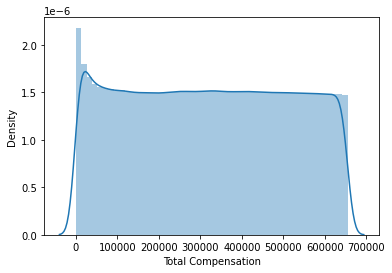

In [122]:
sns.distplot(df['Total Compensation'])
plt.show()

In [123]:
print("Skewness: %f" % df['Total Compensation'].skew())
print("Kurtosis: %f" % df['Total Compensation'].kurt())

Skewness: 0.013964
Kurtosis: -1.207568


In [124]:
df.columns

Index(['Year Type', 'Year', 'Organization Group', 'Department', 'Union',
       'Job Family', 'Job', 'Salaries', 'Overtime', 'Other Salaries',
       'Retirement', 'Health and Dental', 'Other Benefits',
       'Total Compensation'],
      dtype='object')

In [125]:
# Importing K-Means cluster algorithm
from sklearn.cluster import KMeans

In [126]:
kmeans=KMeans(n_clusters=3)

In [127]:
df1 = (df.drop(['Year Type', 'Year', 'Organization Group', 'Department', 'Union', 'Job Family', 'Salaries', 'Overtime', 'Other Salaries', 'Retirement', 'Health and Dental', 'Other Benefits'],axis=1))

In [128]:
df1

,Job,Total Compensation
0,594,225108
1,596,210994
2,618,255185
3,600,418686
4,612,51057
...,...,...
678519,646,446119
678520,646,77058
678521,646,436396
678522,911,506291


In [129]:
kmeans.fit(df1)

KMeans(n_clusters=3)

In [130]:
print(kmeans.cluster_centers_)

[[   825.85152743 100029.98845765]
 [   752.00927629 319976.55495862]
 [   733.25039502 542179.05301285]]


In [131]:
y=kmeans.predict(df1)

In [132]:
y=kmeans.labels_
y

array([1, 1, 1, ..., 2, 2, 2], dtype=int32)

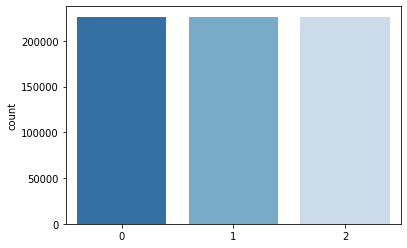

In [133]:
sns.countplot(x=kmeans.labels_, palette='Blues_r')
plt.show()

In [134]:
from scipy.spatial.distance import cdist, pdist
from sklearn.cluster import KMeans

In [135]:
distortions = []
inertias = []
mapping1 = {}
mapping2 = {}
K = range(1, 10)
X= df1
 
for k in K:
    # Building and fitting the model
    kmeanModel = KMeans(n_clusters=k).fit(X)
    kmeanModel.fit(X)
 
    distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_,
                                        'euclidean'), axis=1)) / X.shape[0])
    inertias.append(kmeanModel.inertia_)
 
    mapping1[k] = sum(np.min(cdist(X, kmeanModel.cluster_centers_,
                                   'euclidean'), axis=1)) / X.shape[0]
    mapping2[k] = kmeanModel.inertia_

In [136]:
for key, val in mapping1.items():
    print(f'{key} : {val}')

1 : 165680.02923490875
2 : 82852.7961205765
3 : 55007.22191020792
4 : 41196.02909965211
5 : 32935.008597182445
6 : 27419.603229361193
7 : 23464.36157685825
8 : 20532.757411135157
9 : 18229.815509368516


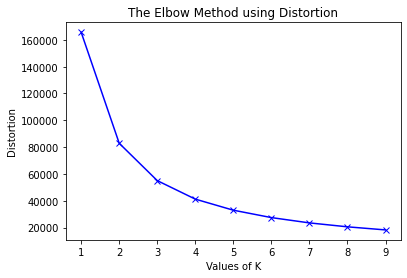

In [137]:
plt.plot(K, distortions, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Distortion')
plt.title('The Elbow Method using Distortion')
plt.show()

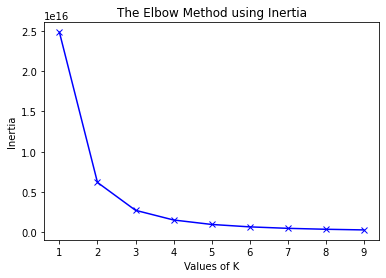

In [138]:
plt.plot(K, inertias, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Inertia')
plt.title('The Elbow Method using Inertia')
plt.show()

In [139]:
# Confirming the K value as 3 from elbow method.
kmeans=KMeans(n_clusters=3)

In [140]:
kmeans.fit(df1)

KMeans(n_clusters=3)

In [141]:
print(kmeans.cluster_centers_)

[[   732.32472593 544554.53417235]
 [   823.9061739  102516.40878108]
 [   752.82389004 324833.22188212]]


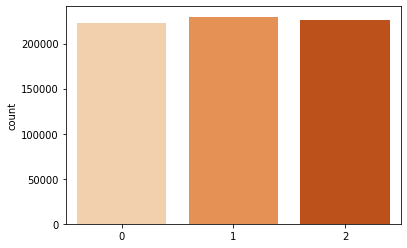

In [142]:
sns.countplot(x=kmeans.labels_, palette='Oranges')
plt.show()